In [2]:
import RSA
import time

In [3]:
RSA_KEYS=[
        {"n":1522605027922533360535618378132637429718068114961380688657908494580122963258952897654000350692006139,"p":37975227936943673922808872755445627854565536638199,"q":40094690950920881030683735292761468389214899724061,
        },{"n":227010481295437363334259960947493668895875336466084780038173258247009162675779735389791151574049166747880487470296548479,"p":327414555693498015751146303749141488063642403240171463406883,"q":693342667110830181197325401899700641361965863127336680673013,
        },{"n":114381625757888867669235779976146612010218296721242362562561842935706935245733897830597123563958705058989075147599290026879543541,"p":3490529510847650949147849619903898133417764638493387843990820577,"q":32769132993266709549961988190834461413177642967992942539798288533,
        },{"n":1807082088687404805951656164405905566278102516769401349170127021450056662540244048387341127590812303371781887966563182013214880557,"p":39685999459597454290161126162883786067576449112810064832555157243,"q":45534498646735972188403686897274408864356301263205069600999044599,
        },{"n":21290246318258757547497882016271517497806703963277216278233383215381949984056495911366573853021918316783107387995317230889569230873441936471,"p":3398717423028438554530123627613875835633986495969597423490929302771479,"q":6264200187401285096151654948264442219302037178623509019111660653946049,
        },{"n":155089812478348440509606754370011861770654545830995430655466945774312632703463465954363335027577729025391453996787414027003501631772186840890795964683,"p":348009867102283695483970451047593424831012817350385456889559637548278410717,"q":445647744903640741533241125787086176005442536297766153493419724532460296199,
        },{"n":10941738641570527421809707322040357612003732945449205990913842131476349984288934784717997257891267332497625752899781833797076537244027146743531593354333897,"p":102639592829741105772054196573991675900716567808038066803341933521790711307779,"q":106603488380168454820927220360012878679207958575989291522270608237193062808643,
        },{"n":2152741102718889701896015201312825429257773588845675980170497676778133145218859135673011059773491059602497907111585214302079314665202840140619946994927570407753,"p":45427892858481394071686190649738831656137145778469793250959984709250004157335359,"q":47388090603832016196633832303788951973268922921040957944741354648812028493909367,
        },{"n":26062623684139844921529879266674432197085925380486406416164785191859999628542069361450283931914514618683512198164805919882053057222974116478065095809832377336510711545759,"p":3586420730428501486799804587268520423291459681059978161140231860633948450858040593963,"q":7267029064107019078863797763923946264136137803856996670313708936002281582249587494493,
        },{"n":188198812920607963838697239461650439807163563379417382700763356422988859715234665485319060606504743045317388011303396716199692321205734031879550656996221305168759307650257059,"p":398075086424064937397125500550386491199064362342526708406385189575946388957261768583317,"q":472772146107435302536223071973048224632914695302097116459852171130520711256363590397527,
        },{"n":191147927718986609689229466631454649812986246276667354864188503638807260703436799058776201365135161278134258296128109200046702912984568752800330221777752773957404540495707851421041,"p":400780082329750877952581339104100572526829317815807176564882178998497572771950624613470377,"q":476939688738611836995535477357070857939902076027788232031989775824606225595773435668861833,
        },{"n":3107418240490043721350750035888567930037346022842727545720161948823206440518081504556346829671723286782437916272838033415471073108501919548529007337724822783525742386454014691736602477652346609,"p":1634733645809253848443133883865090859841783670033092312181110852389333100104508151212118167511579,"q":1900871281664822113126851573935413975471896789968515493666638539088027103802104498957191261465571,
        },{"n":245246644900278211976517663573088018467026787678332759743414451715061600830038587216952208399332071549103626827191679864079776723243005600592035631246561218465817904100131859299619933817012149335034875870551067,"p":435958568325940791799951965387214406385470910265220196318705482144524085345275999740244625255428455944579 ,"q":562545761726884103756277007304447481743876944007510545104946851094548396577479473472146228550799322939273,
        },{"n":2260138526203405784941654048610197513508038915719776718321197768109445641817966676608593121306582577250631562886676970448070001811149711863002112487928199487482066070131066586646083327982803560379205391980139946496955261,"p":68636564122675662743823714992884378001308422399791648446212449933215410614414642667938213644208420192054999687 ,"q":32929074394863498120493015492129352919164551965362339524626860511692903493094652463337824866390738191765712603,
}]

In [4]:
e=1263581691331332127259083713503
for key in RSA_KEYS:
    n=key["n"]
    p=key["p"]
    q=key["q"]
    assert n==p*q ,f"n= {n} , p={p},q={q} is not a valid key"
    key["Q"]=(p-1)*(q-1)
    key["e"]=e
    key["d"]=RSA.InvertModulo(e,key["Q"])


In [5]:
def getBitsCount(num):
    return len(bin(num))-2


In [6]:
m="abcdefghijkzano"*2
encr_times=[]
bits=[]
for key in RSA_KEYS:
    n=key["n"]
    e=key["e"]
    d=key["d"]
    start=time.time()
    for _ in range(1000):
        RSA.getCiphertext(m,n,e)
    encr_times.append(time.time()-start)
    bits.append(getBitsCount(n))

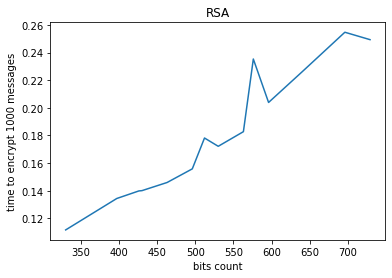

In [7]:

import matplotlib.pyplot as plt
plt.plot(bits, encr_times)
plt.xlabel('bits count')
plt.ylabel('time to encrypt 1000 messages')
plt.title('RSA')
plt.show()